## Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows', None)

#import warnings
#warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble._forest import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

## Data Manipulation

In [3]:
# Function that deletes the first element of the data in the column (we will use it when reading data)

def remove_from_beginning(x):
            return x[1:]

In [4]:
data= pd.read_csv("dcpropertyassessment12302014_11.csv" ,sep= ";" , converters = {'2014_assessment' : remove_from_beginning})



In [5]:
data.head()

,ssl,address,owner,neighborhood,sub_neighborhood,use_code,2014_assessment
0,0150 0295,1727 SEATON ST NW,MARTIN RAVALLION,OLD CITY II,D,23,"633,320.00"
1,0150 0296,1724 V ST NW,KEITH R STEMPLE,OLD CITY II,D,11,"755,120.00"
2,0150 0297,1722 V ST NW,HEATHER M PETRUZZI,OLD CITY II,D,11,"721,760.00"
3,0150 0298,1720 V ST NW,MICHAEL MOSIER,OLD CITY II,D,11,"846,330.00"
4,0150 0299,1718 V ST NW,WILLIAM M BREWSTER,OLD CITY II,D,11,"682,550.00"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199059 entries, 0 to 199058
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ssl               199059 non-null  object
 1   address           199058 non-null  object
 2   owner             199040 non-null  object
 3   neighborhood      199059 non-null  object
 4   sub_neighborhood  154110 non-null  object
 5   use_code          199059 non-null  int64 
 6   2014_assessment   199059 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.6+ MB


In [7]:
# Removing the dots and commas in the currency in the 2014 assessment column

data["2014_assessment"] = data["2014_assessment"].str.replace(',','')
data["2014_assessment"] = data["2014_assessment"].str.replace('.','')

In [8]:
data.head()

,ssl,address,owner,neighborhood,sub_neighborhood,use_code,2014_assessment
0,0150 0295,1727 SEATON ST NW,MARTIN RAVALLION,OLD CITY II,D,23,63332000
1,0150 0296,1724 V ST NW,KEITH R STEMPLE,OLD CITY II,D,11,75512000
2,0150 0297,1722 V ST NW,HEATHER M PETRUZZI,OLD CITY II,D,11,72176000
3,0150 0298,1720 V ST NW,MICHAEL MOSIER,OLD CITY II,D,11,84633000
4,0150 0299,1718 V ST NW,WILLIAM M BREWSTER,OLD CITY II,D,11,68255000


In [9]:
def convert_cols_to_string(df):
    """
    Convert data in columns of a pandas DataFrame to strings.

    Parameters:
        df (pandas.DataFrame): The DataFrame to convert.

    Returns:
        pandas.DataFrame: The converted DataFrame.
    """
    # Loop over all columns in the DataFrame
    for col in df.columns:
        # Convert data in the column to string
        df[col] = df[col].astype(str)
    
    return df

In [10]:
data = convert_cols_to_string(data)

In [11]:
# Converting currency data to numeric value

In [12]:
data[data["2014_assessment"]== 'ot Available'].head()

,ssl,address,owner,neighborhood,sub_neighborhood,use_code,2014_assessment
1352,0238 2010,1310 T ST NW 1,RAYMOND M DITTO,OLD CITY II,E,16,ot Available
1353,0238 2011,1310 T ST NW 2,DAVID R GOODHAND,OLD CITY II,E,16,ot Available
1354,0238 2012,1310 T ST NW P-1,RAYMOND M DITTO,OLD CITY II,E,16,ot Available
1355,0238 2013,1310 T ST NW P-2,DAVID R GOODHAND,OLD CITY II,E,16,ot Available
1777,0273 2169,2035 13TH ST NW 1,RECAP LLC,OLD CITY II,F,18,ot Available


In [13]:
# Dropping rows containing 'ot Available'

data = data[ ~ (data["2014_assessment"] == 'ot Available') ]

In [14]:
data["2014_assessment"] = data["2014_assessment"].astype(int)

In [15]:
# Dropping unnecessary columns

data = data.drop( columns= ['address', 'owner', "ssl"])

## Encoding

In [16]:
cat_col_data = data.select_dtypes(include=['object'])
cat_col_data.head()

,neighborhood,sub_neighborhood,use_code
0,OLD CITY II,D,23
1,OLD CITY II,D,11
2,OLD CITY II,D,11
3,OLD CITY II,D,11
4,OLD CITY II,D,11


In [17]:
encoder = LabelEncoder()
for label in cat_col_data:
    data[label] = encoder.fit_transform(data[label])


In [18]:
data.head()

,neighborhood,sub_neighborhood,use_code,2014_assessment
0,50,3,27,63332000
1,50,3,1,75512000
2,50,3,1,72176000
3,50,3,1,84633000
4,50,3,1,68255000


In [19]:
dms1 = pd.get_dummies(cat_col_data)
data = data.drop(cat_col_data, axis=1)
data= pd.concat([data, dms1], axis=1)

In [20]:
data.head()

,2014_assessment,neighborhood_16TH ST. HEIGHTS,neighborhood_AMERICAN UNIV. PARK,neighborhood_ANACOSTIA,neighborhood_BARRY FARMS,neighborhood_BERKLEY,neighborhood_BOLLING AFB & NAVAL RES,neighborhood_BRENTWOOD,neighborhood_BRIGHTWOOD,neighborhood_BROOKLAND,...,use_code_86,use_code_87,use_code_88,use_code_89,use_code_91,use_code_92,use_code_93,use_code_94,use_code_95,use_code_96
0,63332000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75512000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,72176000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84633000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68255000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

In [21]:
X = data.drop('2014_assessment', axis=1)  
y = data["2014_assessment"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3,
random_state = 0)

In [22]:
regr = RandomForestRegressor(n_estimators = 100)
# Train the model using the training sets
regr.fit(Xtrain, ytrain)
# Make predictions using the testing set
ypred = regr.predict(Xtest)

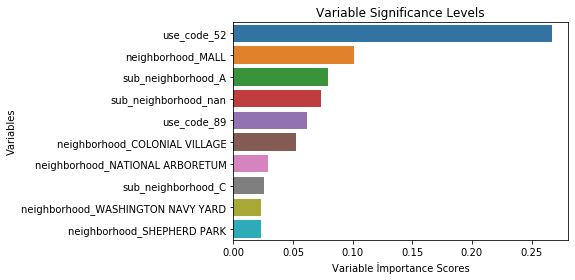

In [23]:
feature_imp = pd.Series(regr.feature_importances_,
                        index=Xtrain.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp.head(10), y=feature_imp.index[:10])
plt.xlabel('Variable İmportance Scores')
plt.ylabel('Variables')
plt.title("Variable Significance Levels")
plt.show()

In [24]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, ypred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, ypred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, ypred))

MAE = 83763922.319
R^2 = 0.33534
MSE = 901224915464874112.000


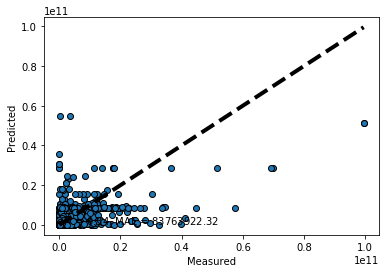

In [25]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred, edgecolors = (0, 0, 0))
ax.text(0.1,6.0, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, ypred), mean_absolute_error(ytest, ypred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()